In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from keras.models import load_model
import tensorflow as tf
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

bauto_lstm = load_model('adani_lstm.h5')

In [38]:
ap_df = pd.read_csv('archive/bajaj-auto.csv')

In [39]:
ap_df = ap_df.drop(['Symbol','Series', 'Turnover','Trades'], axis=1)
ap_df['Date'] = pd.to_datetime(ap_df['Date'], format = '%Y-%m-%d')

In [40]:
y_test = []
for i in range(3060, 3202):
    y_test.append(ap_df.loc[i, 'Close'])

y_test = np.array(y_test)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
columns = ['Prev Close', 'Open', 'High','Low', 'Last','Close', 'VWAP','Volume','Deliverable Volume','%Deliverble']
ap_df[columns] = scaler.fit_transform(ap_df[columns])

In [42]:
ap_df.shape

(3202, 11)

In [43]:
ap_df[columns].shape

(3202, 10)

In [44]:
ap_df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Deliverable Volume,%Deliverble
0,2008-05-26,0.457153,0.159080,0.145757,0.073476,0.076283,0.076952,0.081503,0.465007,0.289329,0.247896
1,2008-05-27,0.076952,0.090720,0.081875,0.080828,0.075076,0.074005,0.076910,0.204648,0.088630,0.148867
2,2008-05-28,0.074005,0.074950,0.077657,0.076092,0.077515,0.077816,0.077496,0.193080,0.216053,0.507875
3,2008-05-29,0.077816,0.089395,0.077041,0.079736,0.076220,0.075606,0.075533,0.077859,0.108028,0.646494
4,2008-05-30,0.075606,0.085893,0.073982,0.070086,0.070185,0.068555,0.066583,0.147342,0.225162,0.721683


In [45]:
X_train = []
y_train = []
X_test = []

for i in range(60,3000):
    X_train.append(ap_df.loc[i-60:i,columns].to_numpy())
    y_train.append(ap_df.loc[i, 'Close'])
for i in range(3060, 3202):
    X_test.append(ap_df.loc[i-60:i, columns].to_numpy())
    
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2940, 61, 10)
(2940,)
(142, 61, 10)
(142,)


In [47]:
bauto_lstm.compile(optimizer='adam', loss = 'mean_squared_error')
bauto_lstm.fit(X_train, y_train, epochs = 50, batch_size=61)

Epoch 1/50
2940/2940 [==============================] - 14s 5ms/step - loss: 9.9850e-04
Epoch 2/50
2940/2940 [==============================] - 10s 3ms/step - loss: 9.6861e-04
Epoch 3/50
2940/2940 [==============================] - 10s 3ms/step - loss: 7.7285e-04
Epoch 4/50
2940/2940 [==============================] - 9s 3ms/step - loss: 7.1374e-04
Epoch 5/50
2940/2940 [==============================] - 9s 3ms/step - loss: 7.8054e-04
Epoch 6/50
2940/2940 [==============================] - 9s 3ms/step - loss: 7.0454e-04
Epoch 7/50
2940/2940 [==============================] - 9s 3ms/step - loss: 6.9004e-04
Epoch 8/50
2940/2940 [==============================] - 9s 3ms/step - loss: 6.3412e-04
Epoch 9/50
2940/2940 [==============================] - 9s 3ms/step - loss: 5.9187e-04
Epoch 10/50
2940/2940 [==============================] - 9s 3ms/step - loss: 5.9710e-04
Epoch 11/50
2940/2940 [==============================] - 9s 3ms/step - loss: 5.6414e-04
Epoch 12/50
2940/2940 [===============

In [72]:
pred_price = bauto_lstm.predict(X_test)

In [73]:
print(pred_price.shape)
print(pred_price)

(142, 1)
[[0.68321824]
 [0.68800914]
 [0.7066513 ]
 [0.71204287]
 [0.7098299 ]
 [0.7045056 ]
 [0.7051542 ]
 [0.7088748 ]
 [0.7091974 ]
 [0.71045554]
 [0.6980008 ]
 [0.6971812 ]
 [0.7008748 ]
 [0.69567126]
 [0.7112201 ]
 [0.6789124 ]
 [0.68132305]
 [0.68054533]
 [0.67305267]
 [0.671077  ]
 [0.6603932 ]
 [0.67051303]
 [0.6735741 ]
 [0.68155086]
 [0.68774056]
 [0.6940933 ]
 [0.69347066]
 [0.6990804 ]
 [0.69878495]
 [0.70241666]
 [0.70588344]
 [0.7033256 ]
 [0.7046263 ]
 [0.70426637]
 [0.7091218 ]
 [0.71133435]
 [0.7172023 ]
 [0.7149617 ]
 [0.7248545 ]
 [0.7386021 ]
 [0.74771863]
 [0.7669039 ]
 [0.768235  ]
 [0.7713635 ]
 [0.77313256]
 [0.77824116]
 [0.77348477]
 [0.7696012 ]
 [0.7749599 ]
 [0.7683574 ]
 [0.7687992 ]
 [0.7705362 ]
 [0.76482546]
 [0.7771714 ]
 [0.7601999 ]
 [0.7616805 ]
 [0.77083135]
 [0.7828307 ]
 [0.79177475]
 [0.7990222 ]
 [0.8019421 ]
 [0.803126  ]
 [0.8101944 ]
 [0.8168659 ]
 [0.8124621 ]
 [0.8122859 ]
 [0.80822945]
 [0.81848204]
 [0.8328682 ]
 [0.83609426]
 [0.8383375

In [87]:
price_np = np.zeros(shape=(pred_price.shape[0], 10))
print(price_np)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [88]:
price_np[:,6] = pred_price[:, 0]

In [91]:
pred_price = scaler.inverse_transform(price_np)

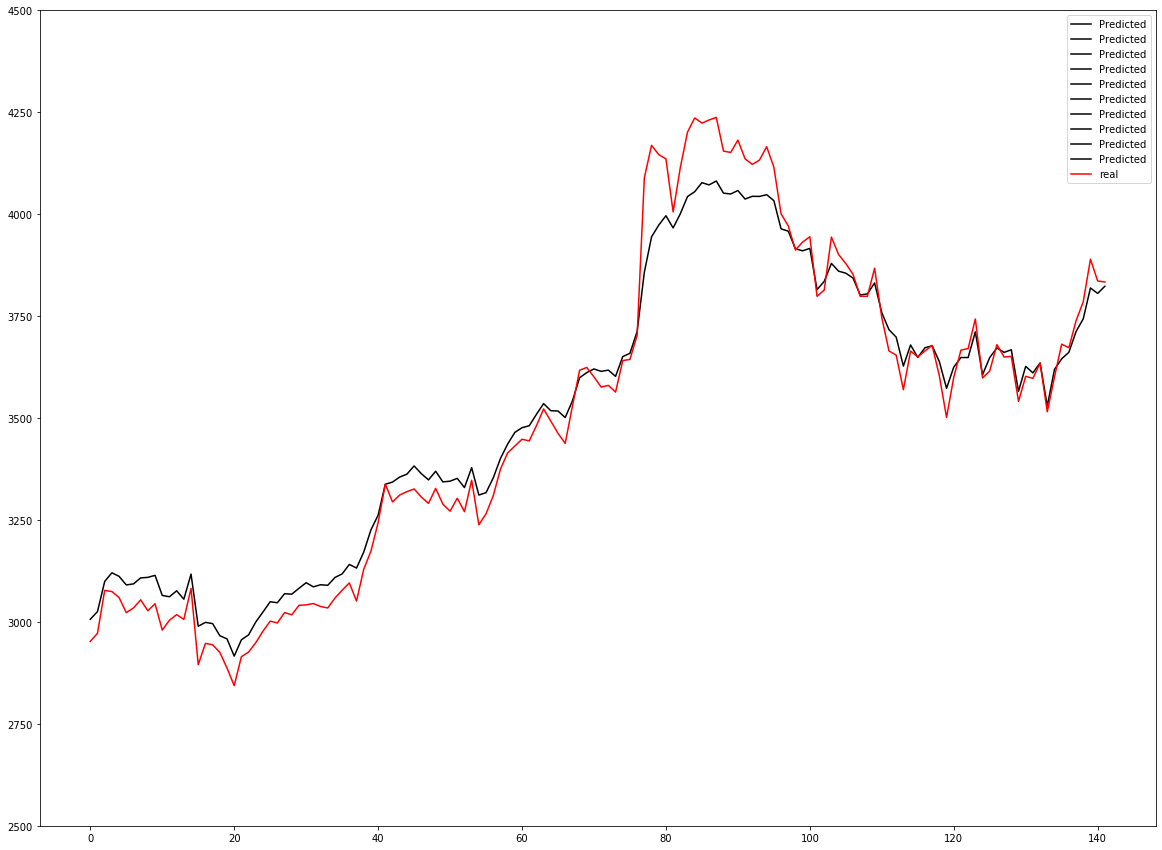

In [97]:
plt.figure(figsize=(20,15))
plt.ylim([2500,4500])
plt.plot(pred_price, color='black', label='Predicted')
plt.plot(y_test, color='red', label='real')
plt.legend()
plt.show()